### Team 1 Housing Price prediction

The aim of this exercise was to predict the prices of houses based on 79 features given by kaggle. So it was a good learning experience to do data cleaning, extracting the most relevant features and do some engineering of some features, filling missing data points. The second part of the challenge was to fit the features to a ML algorithm and tune the parameters to get a generalised solution.

We created a rudimentary pipeline to be able to performed the selected data cleaning and fitting that we thought were the most relevant. The aim was to be able to iterate quickly to find the best solution. The pipeline is just an assembly of functions that can be applied individually or in combination to run through the entire process to create a submission csv file

In [1]:
######### importing python modules 

import numpy as np
import pandas as pd 
import pylab as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


#### Data cleaning
Below is a group of the most important data cleaning functions that we have created. It mostly create ordinal features out of categorical data. In some cases the ordinal translation are self explanatory (e.g Excellent - 5, Great - 4, etc) in some others, we group a category and calculated its median price and then aranged the ordinal features in ascending order of the median prices. 

In [14]:
def df_importer(name):
    # import csv from pandas
    dat = pd.read_csv(name)
    return dat
    
def convert_cat_2_num(indat,param):
    #convert different categories into a numerical order than can be highly correlated
    # this is a generalised function which can convert many different features that contains 
    #these categories
    param_lst = ['Po','Fa','TA','Gd','Ex']
    for i in range (len(param_lst)):
        try:
            indat.loc[indat[param] == param_lst[i], param] = i+1
        except:
            dum = 1
    try:
        indat.loc[indat[param] == 'NA', param] = 0
    except:
        dum = 1  
    try:
        indat[param].fillna(0,inplace=True)
    except:
        dum = 1
    return indat

def convert_GarageFinish(indat,param='GarageFinish'):
    #Convert column GarageFinish to a numerically sensible order
    try:
        indat.loc[indat[param] == 'Fin', param] = 3
    except:
        dum = 1
    try:
        indat.loc[indat[param] == 'RFn', param] = 2
    except:
        dum = 1
    try:
        indat.loc[indat[param] == 'Unf', param] = 1
    except:
        dum = 1
    try:
        indat.loc[indat[param] == 'NA', param] = 0
    except:
        dum = 1        
    try:
        indat[param].fillna(0,inplace=True)
    except:
        dum = 1
    return indat


def convert_GarageType(indat,param='GarageType'):
    #Convert column GarageType to an order related to median prices
    garagetypelst = ['CarPort','Detchd','Basment','2Types','Attchd','BuiltIn']
    for i in range (len(garagetypelst)):
        try:
            indat.loc[indat[param] == garagetypelst[i], param] = i+1
        except:
            dum = 1
    try:
        indat.loc[indat[param] == 'NA', param] = 0
    except:
        dum = 1        
    try:
        indat[param].fillna(0,inplace=True)
    except:
        dum = 1
    return indat

def convert_Neighborhood(indat,param='Neighborhood'):
    #Convert column Neighborhood to a numerically to an order related to median prices
    neighborlst = ['MeadowV','IDOTRR','BrDale','OldTown','Edwards','BrkSide','Sawyer','Blueste',
                   'SWISU','NAmes','NPkVill','Mitchel','SawyerW','Gilbert','NWAmes','Blmngtn',
                    'CollgCr','ClearCr','Crawfor','Veenker','Somerst','Timber','StoneBr','NoRidge','NridgHt']
    for i in range (len(neighborlst)):
        try:
            indat.loc[indat[param] == neighborlst[i], param] = i+1
        except:
            dum = 1
    try:
        indat.loc[indat[param] == 'NA', param] = 0
    except:
        dum = 1        
    try:
        indat[param].fillna(0,inplace=True)
    except:
        dum = 1

    return indat

def convert_MSZoning(indat,param='MSZoning'):
    #Convert column MSZoning to an order related to median prices
    param_lst = ['C (all)','RM','RH','RL','FV']
    for i in range (len(param_lst)):
        try:
            indat.loc[indat[param] == param_lst[i], param] = i+1
        except:
            dum = 1
    try:
        indat.loc[indat[param] == 'NA', param] = 0
    except:
        dum = 1  
    try:
        indat[param].fillna(0,inplace=True)
    except:
        dum = 1
    return indat

def convert_LotShape(indat,param='LotShape'):
    #Convert column LotShape to an order related to median prices
    param_lst = ['Reg','IR1','IR3','IR2']
    for i in range (len(param_lst)):
        try:
            indat.loc[indat[param] == param_lst[i], param] = i+1
        except:
            dum = 1
    try:
        indat.loc[indat[param] == 'NA', param] = 0
    except:
        dum = 1  
    try:
        indat[param].fillna(0,inplace=True)
    except:
        dum = 1
    return indat

def convert_BsmtExposure(indat,param='BsmtExposure'):
    #Convert column BsmtExposure to an order related to median prices
    param_lst = ['No','Mn','Av','Gd']
    for i in range (len(param_lst)):
        try:
            indat.loc[indat[param] == param_lst[i], param] = i+1
        except:
            dum = 1
    try:
        indat.loc[indat[param] == 'NA', param] = 0
    except:
        dum = 1  
    try:
        indat[param].fillna(0,inplace=True)
    except:
        dum = 1
    return indat


def convert_all_categories(indat):
    ## meta converter. if used, the following columns of any dataframe will be converted to numerical column:
    # 'ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond'
    # 'Neighborhood', 'GarageFinish', 'GarageType', 'Neighborhood', 'MSZoning', 'LotShape', 'BsmtExposure'
    list_cat_num = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
    
    for i in range(len(list_cat_num)):
        convert_cat_2_num(indat,list_cat_num[i])

    indat = convert_Neighborhood(indat)
    indat = convert_GarageFinish(indat)
    indat = convert_GarageType(indat)
    indat = convert_Neighborhood(indat)
    indat = convert_MSZoning(indat)
    indat = convert_LotShape(indat)
    indat = convert_BsmtExposure(indat)
    return indat


def load_converted_df(name):
    # load dataframe and convert categorical features into meaningful number.
    df = df_importer(name)
    df1 = convert_all_categories(df)
    return df1

def create_spearman_corr_plot(df_in):
    # creates the spearman correlation plot for all numerical parameters
    plt.style.use('ggplot')
    spearman_corr = df_in.corr(method='spearman')
    fig = plt.figure(figsize=(10,10))
    plt.title('Spearman correlation with sale prices')
    spearman_corr['SalePrice'].plot.barh()
    plt.tight_layout()
    plt.show()
    

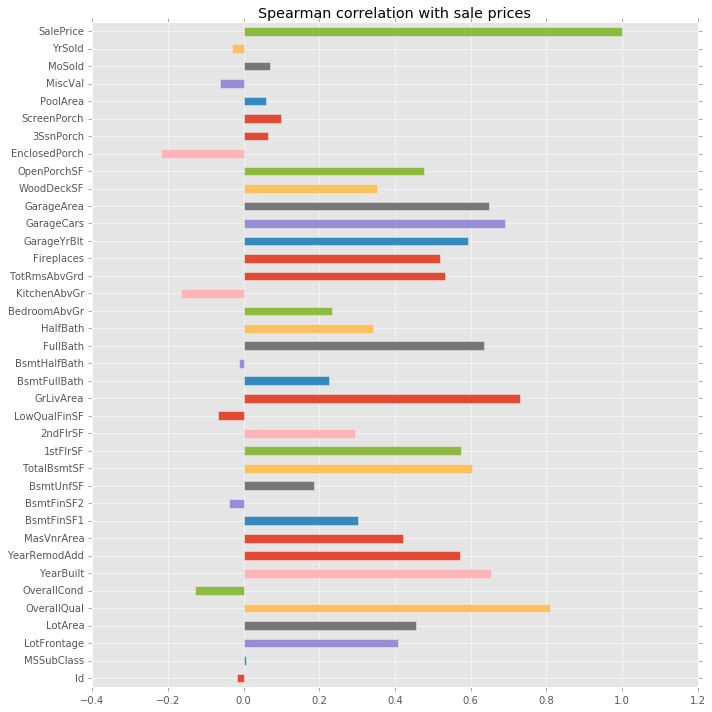

In [15]:
#### loading the train data and looking for correlations only in numerical data
train = pd.read_csv('train.csv')
create_spearman_corr_plot(train)

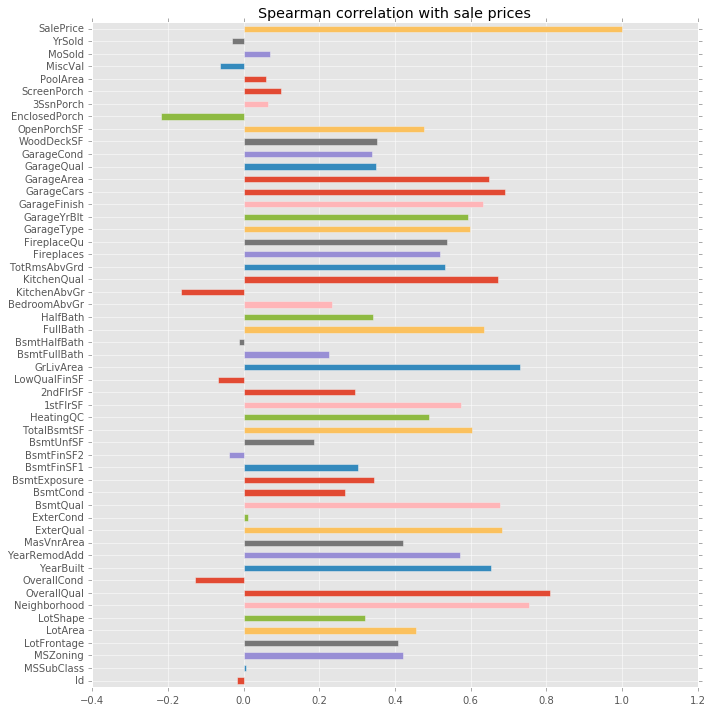

In [16]:
#### loading the train data and looking for correlations only in numerical data
train = pd.read_csv('train.csv')
##### applying the data cleaning routines and redoing the correlation plot
train_new = convert_all_categories(train)
create_spearman_corr_plot(train_new)

After converting string categorical data to ordinal number, we can now find that there are a lot more correlations that originally thought of. For e.g Neighborhood is highly correlated with price. 

#### Machine Learning functions

Series of function which can run a different ML algorithm along with a k-fold cross validation system. This allows to quickly test for different models.

In [111]:

#### function that calculates the RMS value after each k-fold cross validation pass
def rmsle_cv(model,df_in,x_arr,y_arr):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_in.values)
    rmse= np.sqrt(-cross_val_score(model, x_arr, y_arr, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### function which calls and print the results of rmsle_cv in percentage
def print_res(selec_mod,mod,df_in,x_arr,y_arr):
    score = rmsle_cv(mod,df_in,x_arr,y_arr)
    print("\n "+selec_mod+" score: {:.4f}% ({:.4f})\n".format(score.mean()*100, score.std()*100))
    return


### ML meta function which can call any of the 7 different algorithms: Lasso, Elastic Net, Kernel Ridge Reg, 
## SKlean Gradient boosting, XGBoost, LGBoost and Random Forest
## The aim here is to quickly run those models ... for proper parameter tuning then run the selected model 
## separately 
def ML_models(selec_mod,df_in,x_arr,y_arr,x_tes):
    # selec_mod: select model
    # df_in - input dataframe - train DF
    # x_arr = X_train
    # y_arr = Y_train
    # x_tes = X_test

    if selec_mod == 'lasso':
        model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00099, random_state=1,max_iter=50000))
        print_res(selec_mod,model_lasso,df_in,x_arr,y_arr)
        model_lasso.fit(x_arr,y_arr)
        prediction = model_lasso.predict(x_arr)
        prediction1 = model_lasso.predict(x_tes)
        print ((1-model_lasso.score(x_arr,y_arr))*100)
        return prediction1,prediction,model_lasso
    
    if selec_mod == 'Enet':
        model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
        print_res(selec_mod,model_ENet,df_in,x_arr,y_arr)
        model_ENet.fit(x_arr,y_arr)
        prediction = model_ENet.predict(x_arr)
        prediction1 = model_ENet.predict(x_tes)
        print ((1-model_ENet.score(x_arr,y_arr))*100)
        return prediction1,prediction,model_ENet
    
    if selec_mod == 'KRR':
        model_KRR = make_pipeline(RobustScaler(), KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))
        print_res(selec_mod,model_KRR,df_in,x_arr,y_arr)
        model_KRR.fit(x_arr,y_arr)
        prediction = model_KRR.predict(x_arr)
        prediction1 = model_KRR.predict(x_tes)
        print ((1-model_KRR.score(x_arr,y_arr))*100)
        return prediction1,prediction,model_KRR
    
    if selec_mod == 'GBoost':
        model_GBoost = make_pipeline(RobustScaler(), GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5))

        print_res(selec_mod,model_GBoost,df_in,x_arr,y_arr)
        model_GBoost.fit(x_arr,y_arr)
        prediction = model_GBoost.predict(x_arr)
        prediction1 = model_GBoost.predict(x_tes)
        print ((1-model_GBoost.score(x_arr,y_arr))*100)
        return prediction1,prediction,model_GBoost
    
    if selec_mod == 'xgb':
        model_xgb = make_pipeline(RobustScaler(), xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1))
        
        print_res(selec_mod,model_xgb,df_in,x_arr,y_arr)
        model_xgb.fit(x_arr,y_arr)
        prediction = model_xgb.predict(x_arr)
        prediction1 = model_xgb.predict(x_tes)
        print ((1-model_xgb.score(x_arr,y_arr))*100)
        return prediction1,prediction,model_xgb
    
    if selec_mod == 'lgb':
        model_lgb = make_pipeline(RobustScaler(),lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11))
        
        print_res(selec_mod,model_lgb,df_in,x_arr,y_arr)
        model_lgb.fit(x_arr,y_arr)
        prediction = model_lgb.predict(x_arr)
        prediction1 = model_lgb.predict(x_tes)
        print ((1-model_lgb.score(x_arr,y_arr))*100)
        return prediction1,prediction,model_lgb


    if selec_mod == 'randomforest':
        model_randomfor =  RandomForestRegressor(n_estimators=3000,max_depth=50,criterion='mse')

        print_res(selec_mod,model_randomfor,df_in,x_arr,y_arr)
        model_randomfor1 = model_randomfor.fit(x_arr,y_arr)
        prediction = model_randomfor.predict(x_arr)
        prediction1 = model_randomfor.predict(x_tes)
        print ((1-model_randomfor.score(x_arr,y_arr))*100)  
        return prediction1,prediction,model_randomfor1    
    

We are now ready to play around with the data and try to get the best possible solution. First we need to merge the train and test dataset as we intend to use one-hot-encoding. This prevents us from having different number of features in the test and train dataset

In [48]:
#load test train data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#merge data using pandas 
mergedata = pd.concat([train,test])

#re-ordering the data in the original column order and saving
mergedata = mergedata[list(train.columns.values)]
mergedata.to_csv('merged_out.csv',index=False)

In [59]:
### loading the merged data and then applying the data cleaning on the merged dataset
mergedata = load_converted_df('merged_out.csv')
#### looking for columns which has the most nans
nancols = mergedata.isnull().sum()
print nancols.sort_values(ascending=True)

Id                  0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
Heating             0
FireplaceQu         0
GarageFinish        0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
GarageType          0
                 ... 
RoofMatl            0
RoofStyle           0
ExterCond           0
ExterQual           0
Foundation          0
Exterior2nd         1
SaleType            1
BsmtFinSF1          1
BsmtFinSF2          1
TotalBsmtSF         1
Exterior1st         1
BsmtUnfSF           1
GarageCars          1
Electrical          1
GarageArea

We decide to drop all the features that have 23 or more nans and some other features based on the lack of variety that the features contain.

In [85]:
def label_encoding(df_in):
    #function to use label encoder to encode string columns - returns numerical columns 
    dfin_str = df_in.select_dtypes(include=['object'])

    for col in dfin_str:
        lbl = LabelEncoder() 
        lbl.fit(list(df_in[col].values)) 
        df_in[col] = lbl.transform(list(df_in[col].values))
        #pd.get_dummies(df_in,prefix=[col], drop_first=True)
        df_in = pd.concat([df_in,pd.get_dummies(df_in[col], prefix=col,drop_first=True)],axis=1)
        df_in.drop([col],axis=1, inplace=True)
    return df_in

feature_drop = ['Id','LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual',
                'GarageCond','PoolQC','Fence','MiscFeature']


train_test = load_converted_df('merged_out.csv')
## dropping some features based on the amount of NaNs present in the columns
## threshold of 20 or more NaNs to drop a column
train_test_set = train_test.drop(feature_drop,axis=1)
#### one hot encoding all the categorical string variables
train_test_set = label_encoding(train_test_set) 
train_test_set = train_test_set.fillna(0)


In [86]:
### splitting test and train back to original format
train = train_test_set.iloc[:1460,:]
test = train_test_set.iloc[1460:,:]
#test.drop(['SalePrice'],axis=1, inplace=True)

train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


Y_train = np.log(train['SalePrice'].values)
train.drop(['SalePrice'],axis=1, inplace=True)
X_train = train.values

X_test = test.iloc[:,:-1].values

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


We ran Random Forest and ...

In [112]:
model_name = 'randomforest'
out1, out2, out3 = ML_models(model_name,train,X_train,Y_train,X_test)

new_array = np.zeros((len(X_test),2),int)
testid = pd.read_csv('test.csv')
new_array[:,0] = testid['Id'].values
new_array[:,1] = np.exp(out1)
np.savetxt(model_name+'4.csv',new_array,delimiter=',',header='Id,SalePrice',comments='',fmt='%d')


 randomforest score: 13.5092% (0.5807)

1.50110316634


In [117]:
randF_features = pd.DataFrame()
randF_features['Features'] = list(train.columns.values)
randF_features['Feature_Importance'] = 100*out3.feature_importances_
print randF_features.sort_values(['Feature_Importance'],ascending=False)

           Features  Feature_Importance
5       OverallQual           54.684218
19        GrLivArea           11.017278
4      Neighborhood            8.049586
14      TotalBsmtSF            3.776534
30       GarageArea            2.791725
16         1stFlrSF            2.276969
11       BsmtFinSF1            2.252993
29       GarageCars            2.199375
2           LotArea            1.243447
6       OverallCond            1.026976
7         YearBuilt            1.026242
131    CentralAir_1            0.942824
8      YearRemodAdd            0.904042
13        BsmtUnfSF            0.601656
1          MSZoning            0.594830
32      OpenPorchSF            0.452054
17         2ndFlrSF            0.432310
38           MoSold            0.379132
26      KitchenQual            0.332148
31       WoodDeckSF            0.323444
27     TotRmsAbvGrd            0.321508
28       Fireplaces            0.308075
10        ExterCond            0.226240
0        MSSubClass            0.219759


... use the feature importance from Random Forest as a Feature selection criteria. We apply a cut at 0.1% importance for all features that are selected. A feature list is created based on the feature imporatnce and we reload the data that will now be fit to different algorithms

In [118]:
feature_drop = ['Id','LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual',
                'GarageCond','PoolQC','Fence','MiscFeature']


### next part does not require coding - just go to the feature_importance csv file ... 
### decide a threshold on which to select columns - in my case I selected everything everything
### above 0.1 and created a list from this threshold. This feature list is shown below

feature_lst = ['SaleCondition_4','FullBath','BedroomAbvGr','YrSold','ExterQual','HeatingQC','BsmtFullBath',
               'EnclosedPorch','MSSubClass','ExterCond','Fireplaces','WoodDeckSF','KitchenQual','TotRmsAbvGrd',
               'MoSold','2ndFlrSF','OpenPorchSF','MSZoning','BsmtUnfSF','YearRemodAdd','CentralAir_1',
               'OverallCond','YearBuilt','LotArea','GarageCars','BsmtFinSF1','1stFlrSF','GarageArea',
               'TotalBsmtSF','Neighborhood','GrLivArea','OverallQual','SalePrice']
    
    
#### using the same old code to load the merged dataset 

train_test = load_converted_df('train_test_merge.csv')
train_test_set = train_test.drop(feature_drop,axis=1)
train_test_set = label_encoding(train_test_set)
train_test_set = train_test_set.fillna(0)


#### but this line is added to only select the columns that met the threshold we selected
train_test_set = train_test_set[feature_lst]

train = train_test_set.iloc[:1460,:]
test = train_test_set.iloc[1460:,:]

train.to_csv('new_train1.csv')
test.to_csv('new_test1.csv')

train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


Y_train = np.log(train['SalePrice'].values)
train.drop(['SalePrice'],axis=1, inplace=True)
X_train = train.values

X_test = test.iloc[:,:-1].values

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We can now run our model. We saw online that lasso+xgb gave good results, so we started there and then combined more models which was our best solution.

##### Lasso Model

In [137]:
#simple root mean square
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


#### Simple Lasso model
lasso = Lasso(alpha=0.00099, max_iter=50000)
lasso.fit(X_train,Y_train)
train_y_predlass = lasso.predict(X_train)
y_test = Y_train
print("Lasso score on training set: ", 100*rmse(y_test, y_predlass))

y_pred_lasso = lasso.predict(X_test)

('Lasso score on training set: ', 11.713443231885925)


#### XBG model

In [138]:
xgbreg = xgb.XGBRegressor(colsample_bytree=0.2,gamma=0.0,learning_rate=0.01,max_depth=10,min_child_weight=1.5,
                          n_estimators=7200,reg_alpha=0.9,reg_lambda=0.6,subsample=0.2,seed=10,silent=1)

xgbreg.fit(X_train,Y_train)

# Run prediction on training set to get a rough idea of how well it does.
train_y_predxgb = xgbreg.predict(X_train)
y_test = Y_train
print("XGBoost score on training set: ", 100*rmse(y_test, y_predxgb))

# Run prediction on the Kaggle test set.
y_pred_xgb = xgbreg.predict(X_test)

('XGBoost score on training set: ', 8.8457513395908105)


#### Gboost

In [125]:
model_name = 'GBoost'
out1G, out2G, out3G = ML_models(model_name,train,X_train,Y_train,X_test)


 GBoost score: 12.2182% (0.7961)

1.39057188498


#### Elastic Net

In [126]:
model_name = 'Enet'
out1E, out2E, out3E = ML_models(model_name,train,X_train,Y_train,X_test)


 Enet score: 12.0840% (0.5001)

8.56828798414


#### Kernel Ridge Regression

In [128]:
model_name = 'KRR'
out1K, out2K, out3K = ML_models(model_name,train,X_train,Y_train,X_test)


 KRR score: 12.5016% (1.1074)

5.83975832362


We then added all the models together and computed an average.

In [130]:
################# Adding all the models we ran together to get an average


y_pred = (y_pred_xgb + (out1G) + y_pred_lasso  + out1E + out1K ) / 5.
y_pred = np.exp(y_pred)

#reading the IDs from the test.csv file and adding them to the submission
testid = pd.read_csv('test.csv')
pred_df = pd.DataFrame(y_pred, index=testid["Id"], columns=["SalePrice"])
pred_df.to_csv('gboost_xgb_lasso_Enet_KRR2.csv', header=True, index_label='Id')

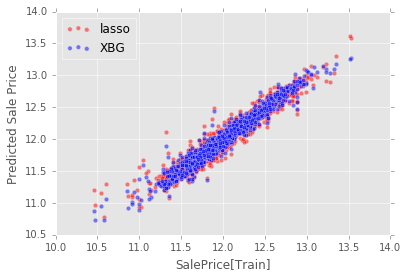

In [146]:
plt.style.use('ggplot')
plt.scatter(Y_train,train_y_predlass,alpha=0.5,c='r',label='lasso')
plt.scatter(Y_train,train_y_predxgb,alpha=0.5,c='b',label='XBG')
plt.xlabel('SalePrice[Train]')
plt.ylabel('Predicted Sale Price')
plt.legend(loc=2)

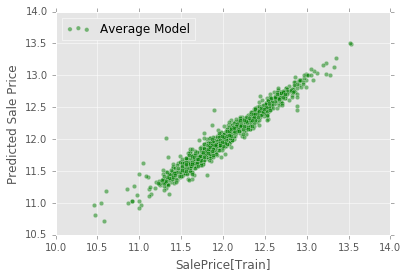

In [145]:
average_mod = (train_y_predlass+train_y_predxgb+out2G+out2E+out2K)/5.
plt.scatter(Y_train,average_mod,alpha=0.5,c='g',label='Average Model')
plt.xlabel('SalePrice[Train]')
plt.ylabel('Predicted Sale Price')
plt.legend(loc=2)

### What we tried but did not work: